In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
review = pd.read_csv('../input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv')
film = pd.read_csv('../input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')

In [3]:
film['original_release_date'].astype(str).apply(lambda x: x[8:10])

0        12
1        30
2        05
3        13
4        01
         ..
17707    02
17708    04
17709    17
17710    17
17711    14
Name: original_release_date, Length: 17712, dtype: object

In [4]:
film['original_release_year'] = film['original_release_date'].astype(str).apply(lambda x: x[:4])
film['original_release_month'] = film['original_release_date'].astype(str).apply(lambda x: x[5:7])
film['original_release_dom'] = film['original_release_date'].astype(str).apply(lambda x: x[8:10])
film['genre_1'] = film['genres'].str.split(', ', expand=True)[0]
film['genres'].str.split(', ', expand=True)[0]

0        Action & Adventure
1                    Comedy
2                    Comedy
3                  Classics
4        Action & Adventure
                ...        
17707                 Drama
17708    Action & Adventure
17709    Action & Adventure
17710              Classics
17711    Action & Adventure
Name: 0, Length: 17712, dtype: object

<AxesSubplot:>

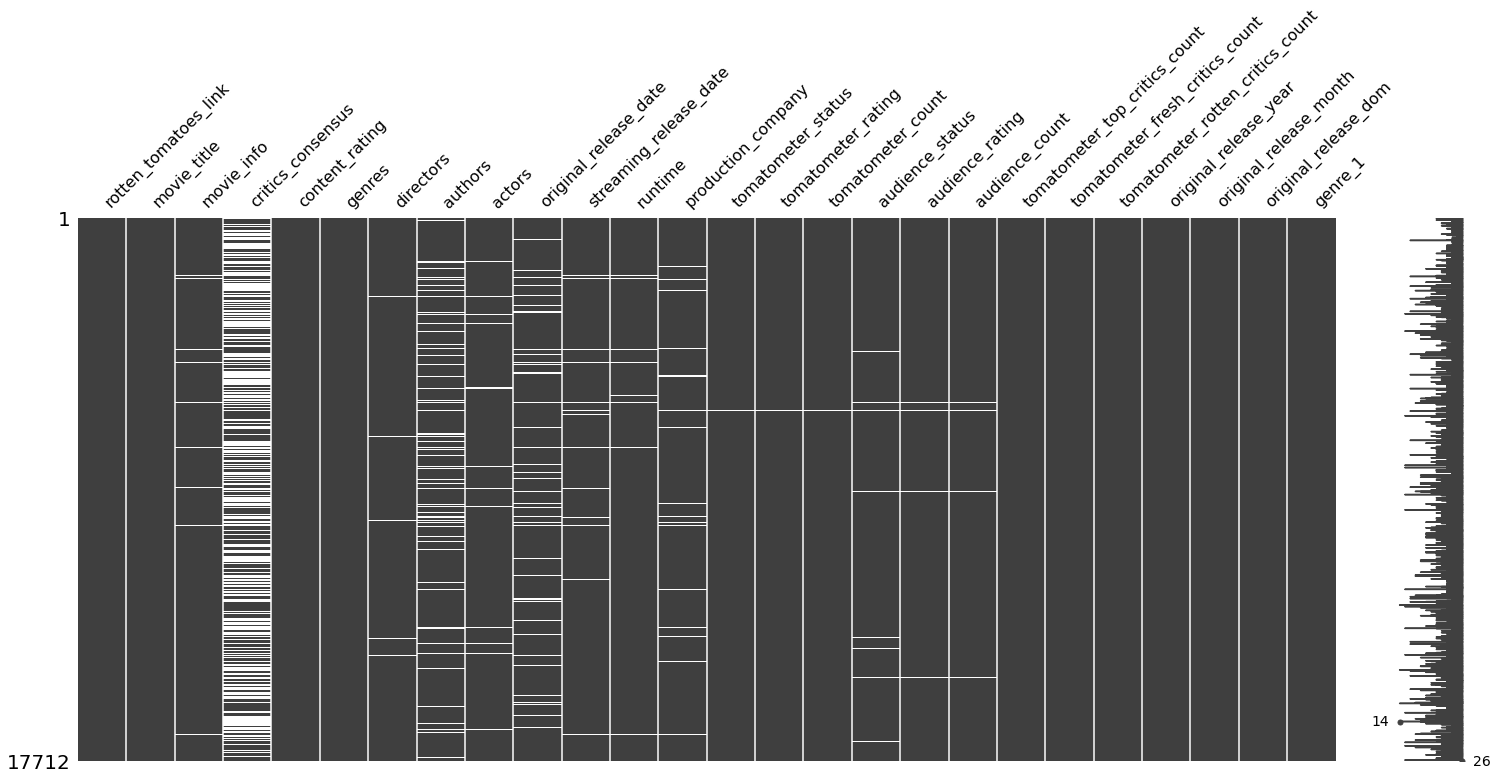

In [5]:
msno.matrix(film)

In [6]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [7]:
film.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,original_release_year,original_release_month,original_release_dom,genre_1
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Spilled,53.0,254421.0,43,73,76,2010,02,12,Action & Adventure
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Upright,64.0,11574.0,44,123,19,2010,04,30,Comedy
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Spilled,53.0,14684.0,2,16,8,1979,10,05,Comedy
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Upright,97.0,105386.0,6,54,0,1957,04,13,Classics
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Upright,74.0,68918.0,5,24,3,1954,01,01,Action & Adventure


(array([  39.,  361., 1021., 1770., 2262., 2437., 2716., 3043., 2785.,
         982.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

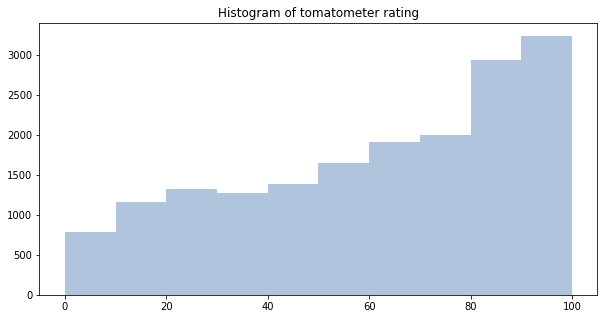

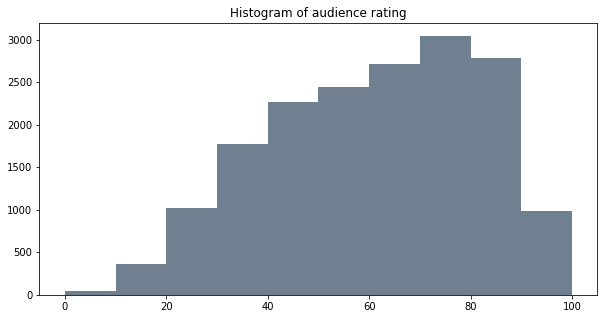

In [8]:
plt.figure( figsize=(10,5))
plt.title('Histogram of tomatometer rating')
plt.hist(film['tomatometer_rating'], bins = 10, histtype='bar', color='lightsteelblue')

plt.figure( figsize=(10,5))
plt.title('Histogram of audience rating')
plt.hist(film['audience_rating'], bins = 10, histtype='bar', color='slategrey')

Text(0.5, 1.0, 'Histogram of runtime')

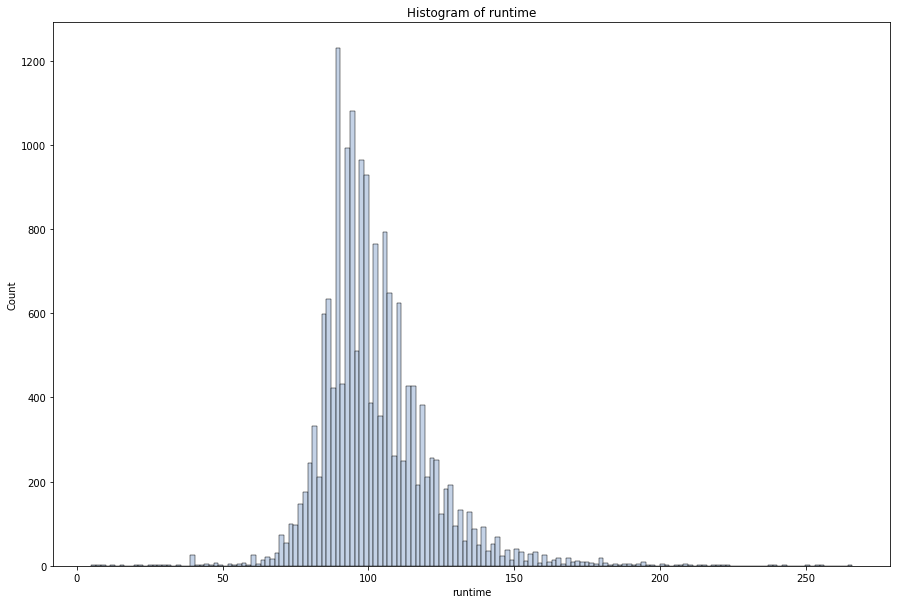

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(data=film, x=film['runtime']
             , palette='Purples'
            ,color='lightsteelblue')
plt.title('Histogram of runtime')

<AxesSubplot:xlabel='content_rating', ylabel='count'>

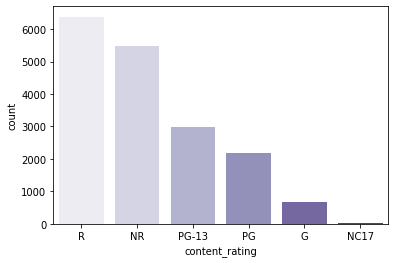

In [10]:
sns.countplot(data=film, x='content_rating'
              , palette='Purples'
              , order=film['content_rating'].value_counts().index)

<AxesSubplot:xlabel='tomatometer_status', ylabel='count'>

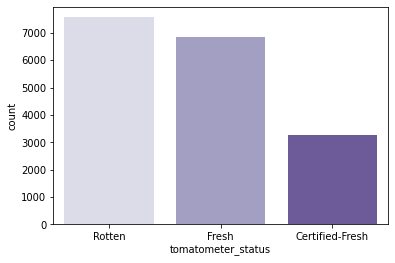

In [11]:
sns.countplot(data=film, x='tomatometer_status'
              , palette='Purples'
             , order=film['tomatometer_status'].value_counts().index)

<AxesSubplot:xlabel='audience_status', ylabel='count'>

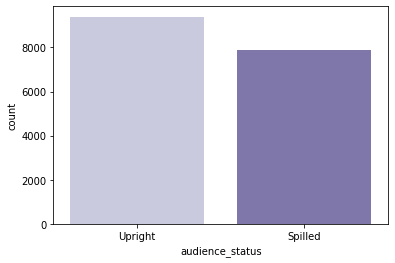

In [12]:
sns.countplot(data=film, x='audience_status'
              , palette='Purples'
             , order= film['audience_status'].value_counts().index)

<AxesSubplot:>

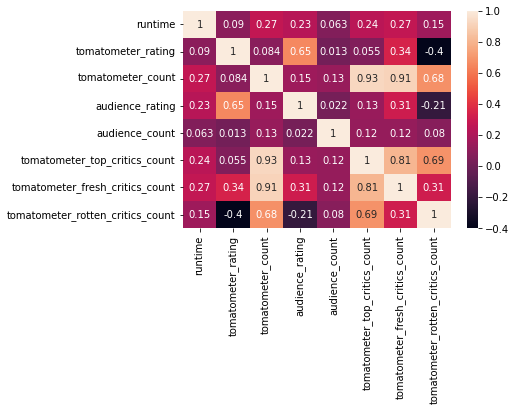

In [13]:
corr = film.corr()
sns.heatmap(corr, annot=True)

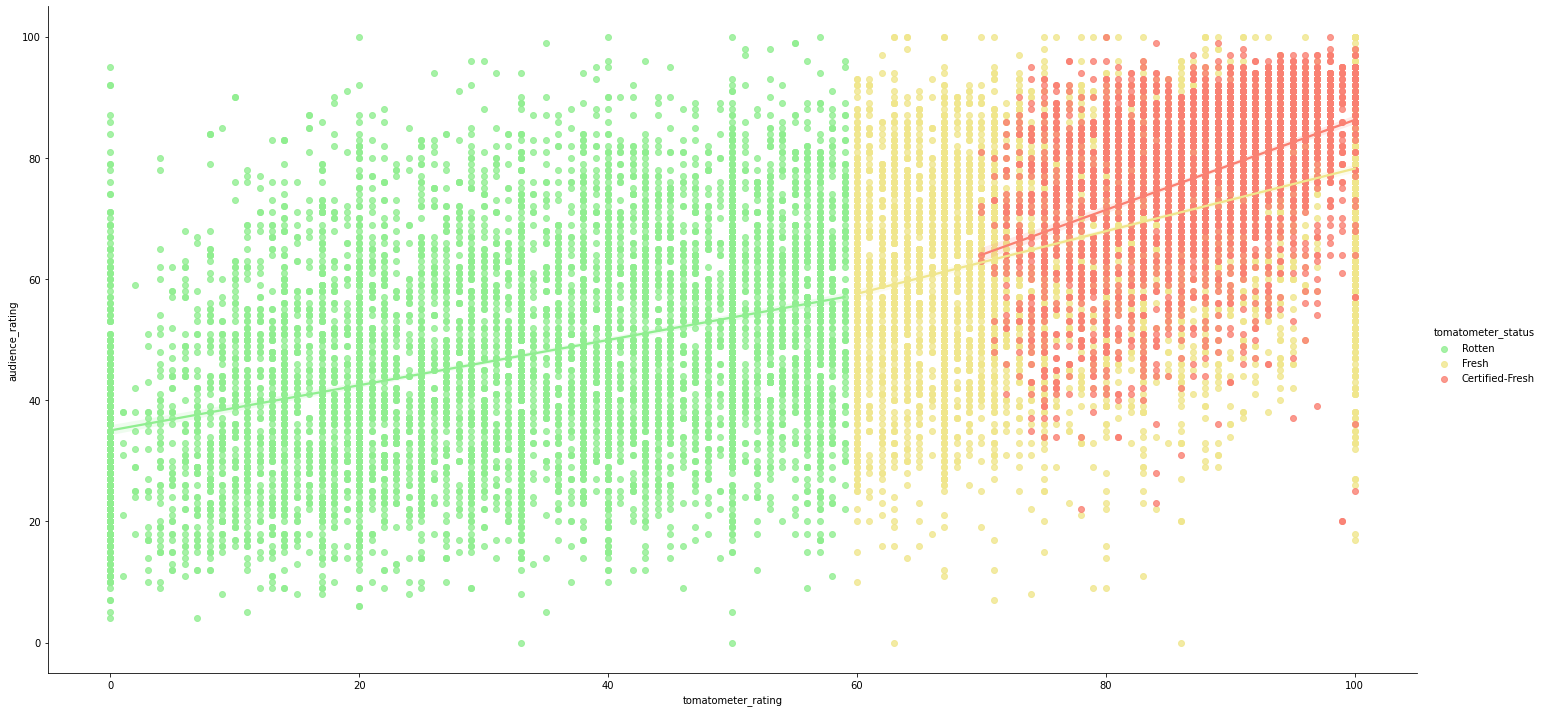

In [14]:
g = sns.lmplot(
    data=film,
    x='tomatometer_rating', y='audience_rating', hue="tomatometer_status", height=10, aspect=2, palette=['lightgreen', 'khaki', 'salmon'], hue_order=['Rotten', 'Fresh', 'Certified-Fresh'])

Text(0.5, 1.0, 'Number of films through out 1914 : 2020')

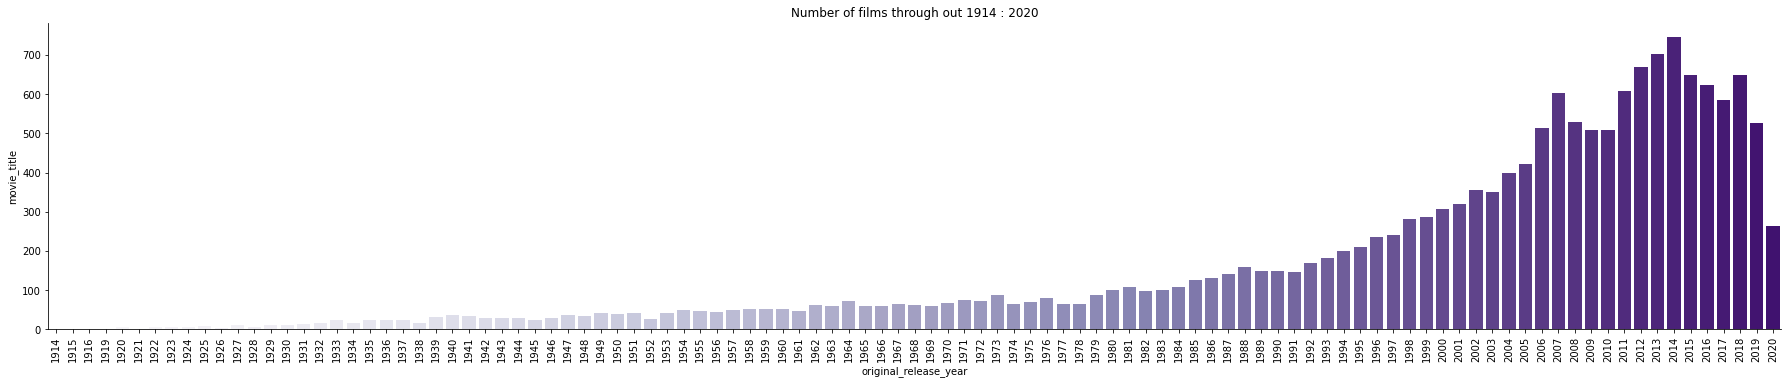

In [15]:
tmp = film.groupby('original_release_year').agg({'movie_title':'count'}).reset_index()

a=tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).min()
b=tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int).max()

sns.catplot(data=tmp[~(tmp['original_release_year'] == 'nan')], kind='bar', x='original_release_year', y='movie_title', aspect=5, palette='Purples')
plt.xticks(rotation=90)
plt.title(f"Number of films through out {a} : {b}")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

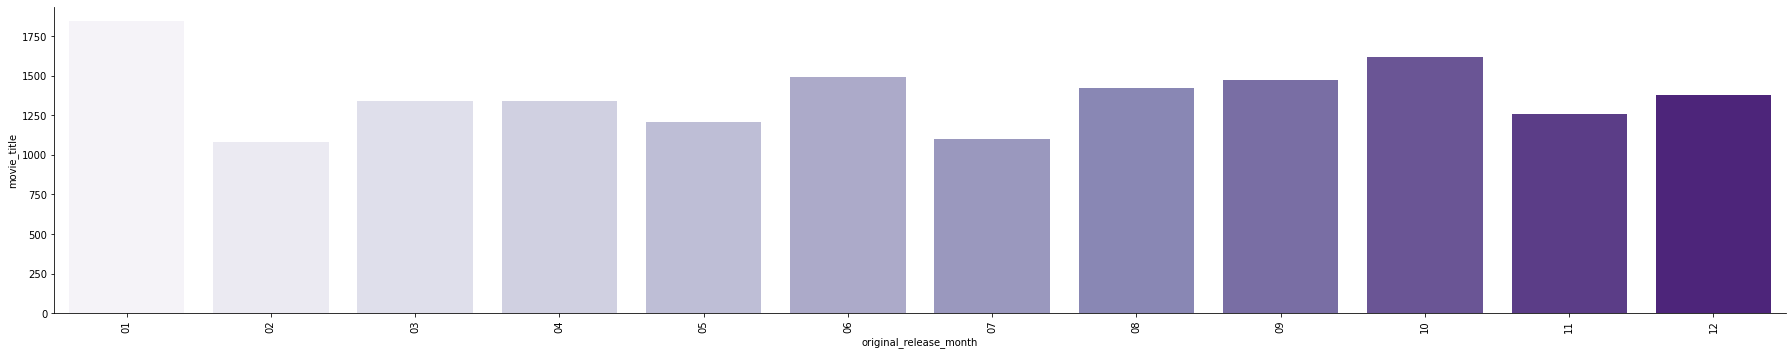

In [16]:
tmp = film.groupby('original_release_month').agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == ''))], kind='bar', x='original_release_month', y='movie_title', aspect=5, palette='Purples')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

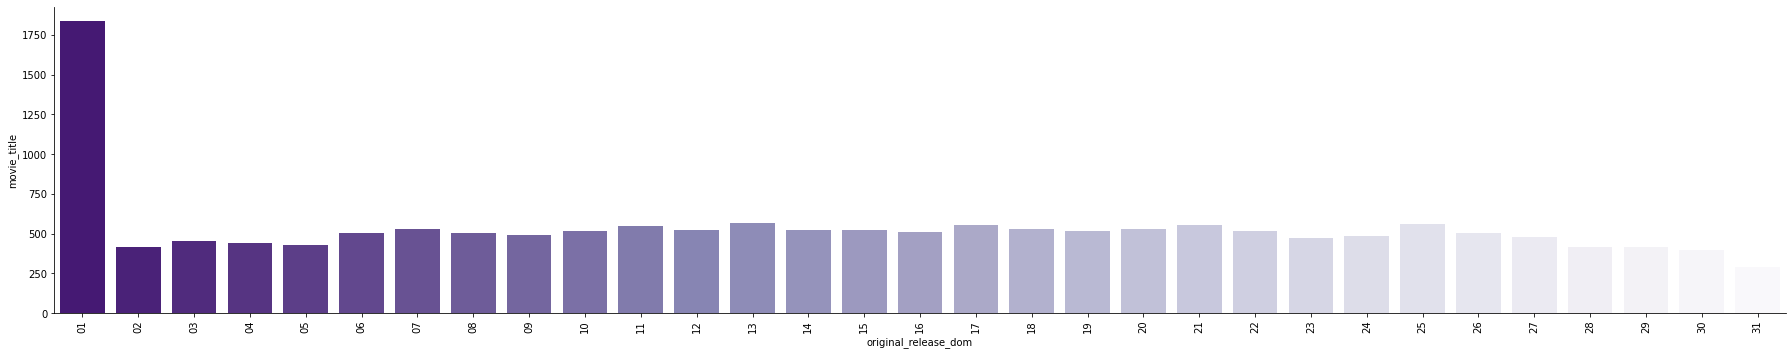

In [17]:
tmp = film.groupby('original_release_dom').agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_dom'] == 'nan') | (tmp['original_release_dom'] == ''))], kind='bar', x='original_release_dom', y='movie_title', aspect=5, palette='Purples_r')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action & Adventure'),
  Text(3, 0, 'Art House & International'),
  Text(4, 0, 'Documentary'),
  Text(5, 0, 'Classics'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Animation'),
  Text(8, 0, 'Mystery & Suspense'),
  Text(9, 0, 'Kids & Family')])

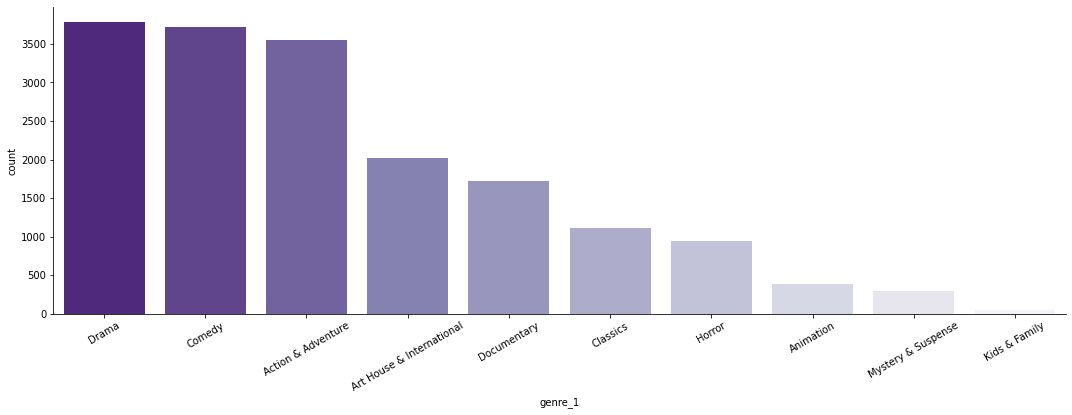

In [18]:
sns.catplot(kind='count', data=film, x='genre_1', aspect=3, order=film['genre_1'].value_counts().iloc[:10].index, palette='Purples_r')
plt.xticks(rotation=30)

Text(0.5, 1.0, 'Trend of Genre through out 1914 : 2020')

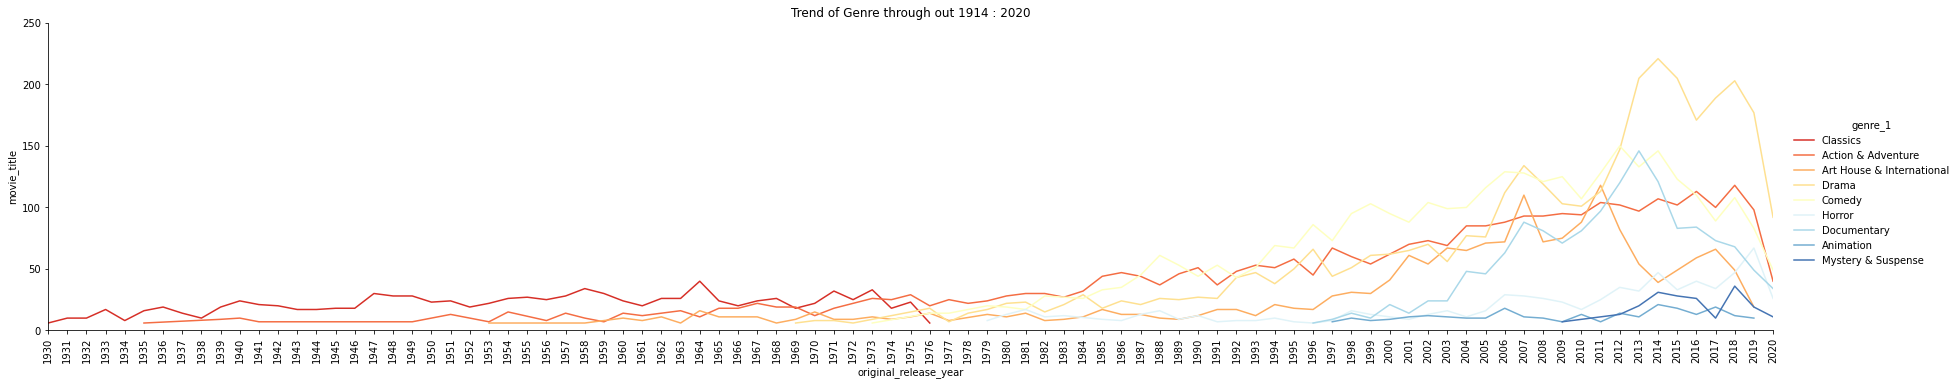

In [19]:
tmp = film.groupby(['original_release_year', 'genre_1']).agg({'movie_title':'count'}).reset_index()

sns.relplot(data=tmp[~(tmp['original_release_year'] == 'nan') & (tmp['movie_title'] > 5) & (tmp[~(tmp['original_release_year'] == 'nan')]['original_release_year'].astype(int) > 5)]
            , kind='line', x='original_release_year', y='movie_title'
            , aspect=5, palette='RdYlBu'
           , hue='genre_1')
plt.xticks(rotation=90)
plt.axis(['1930','2020',0,250])
plt.title(f'Trend of Genre through out {a} : {b}')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

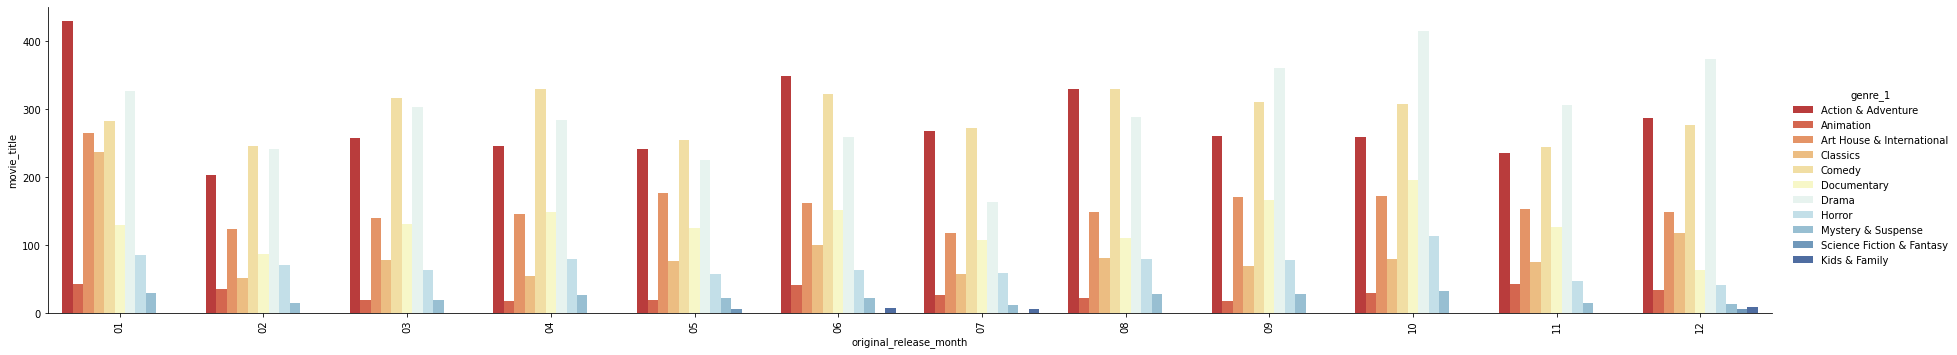

In [20]:
tmp = film.groupby(['original_release_month', 'genre_1']).agg({'movie_title':'count'}).reset_index()
sns.catplot(data=tmp[~((tmp['original_release_month'] == 'nan') | (tmp['original_release_month'] == '')) & (tmp['movie_title'] > 5)], kind='bar', x='original_release_month', y='movie_title'
            , aspect=5, palette='RdYlBu'
            , hue='genre_1')
plt.xticks(rotation=90)

In [21]:
def keyword_month(keyword, col,  regex=True, aspect=3):
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby('original_release_month').agg({"movie_title":"count"}).reset_index()
    df_c = df[~(df['original_release_month'] == '')]
    sns.catplot(data=df_c, kind='bar', x='original_release_month', y='movie_title'
            , aspect=aspect
            , palette='RdYlBu'
           )
    plt.xticks(rotation=0)
    plt.title(f'Number of films contain this keyword: "{keyword}" by Month of release')
def keyword_trend(keyword, col,  regex=True, aspect=3):
    tick = np.arange(1914, 2021, step=1)
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby(['original_release_year']).agg({"movie_title":"count"}).reset_index()
    df_c = df[~((df['original_release_year'] == '') | (df['original_release_year'] == 'nan'))]
    sns.catplot(data=df_c, kind='bar', x='original_release_year', y='movie_title'
            , aspect=aspect
            , palette='Purples'
           )
    plt.title(f'Trend of films contain this keyword: "{keyword}" through out {a} : {b}')
def keyword_rotten(keyword, col, regex=True, aspect=3):
    df = film[film[str(col)].str.contains(keyword, regex=regex).fillna(False)].groupby('tomatometer_status').agg({"movie_title":"count"}).reset_index()
    df_c = df[~(df['tomatometer_status'] == '')]
    sns.catplot(data=df_c, kind='bar'
                , x='tomatometer_status', y='movie_title'
                , aspect=aspect
                , palette='RdYlGn'
               )
    plt.xticks(rotation=0)

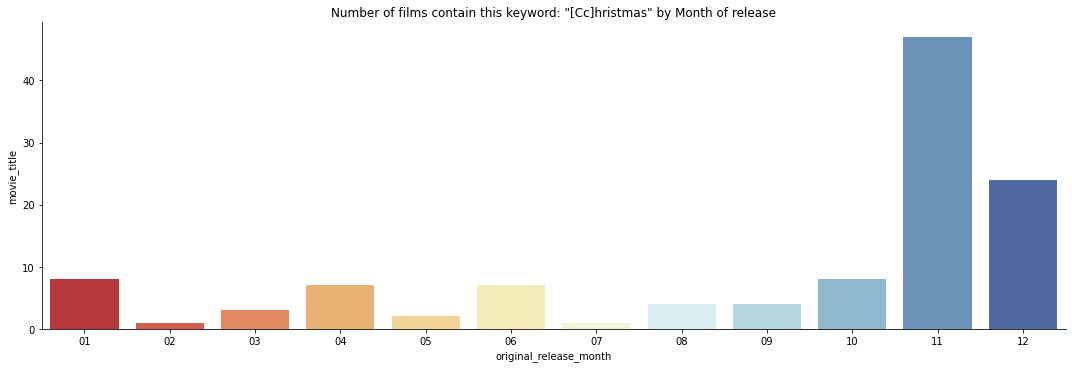

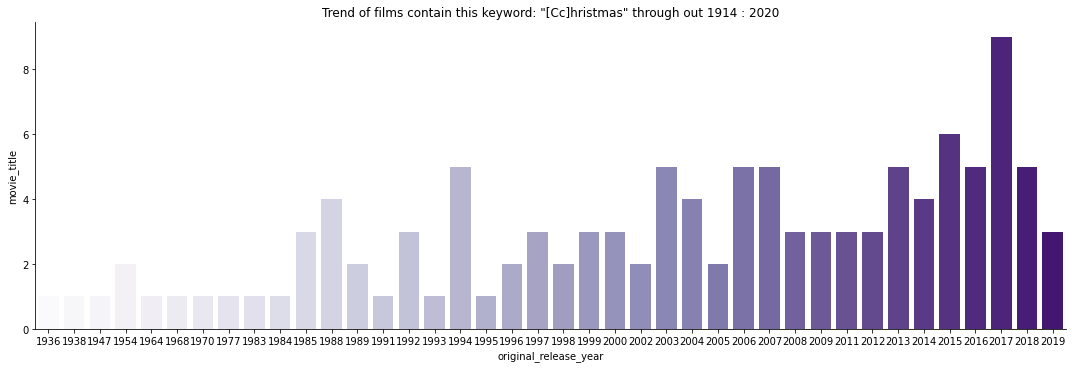

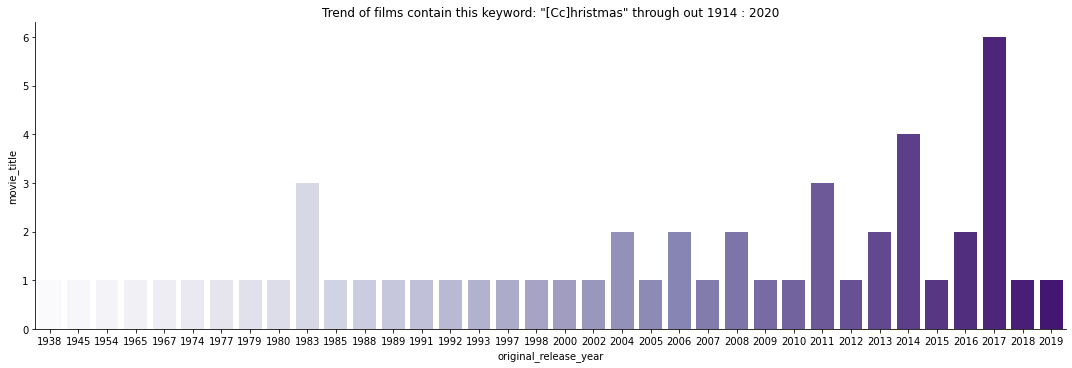

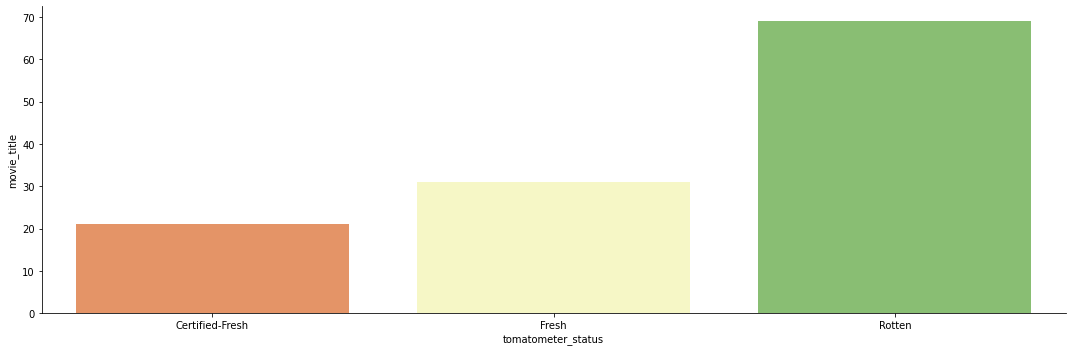

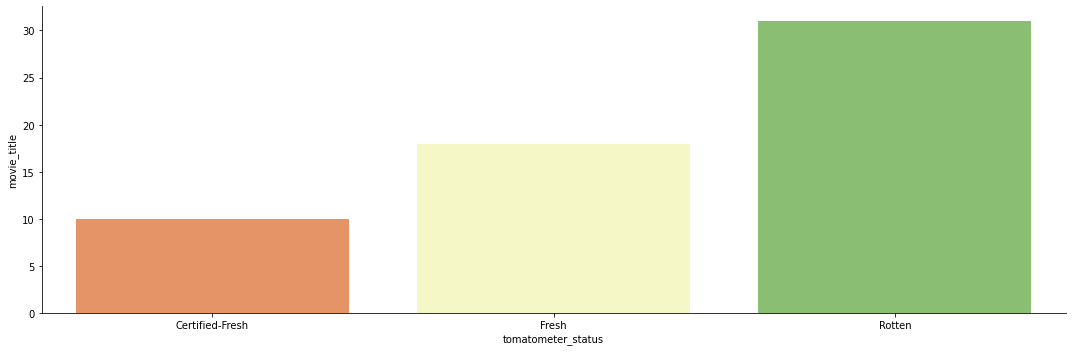

In [22]:
keyword_month('[Cc]hristmas', 'movie_info')

keyword_trend('[Cc]hristmas', 'movie_info')

keyword_trend('[Cc]hristmas', 'movie_title')

keyword_rotten('[Cc]hristmas', 'movie_info')

keyword_rotten('[Cc]hristmas', 'movie_title')

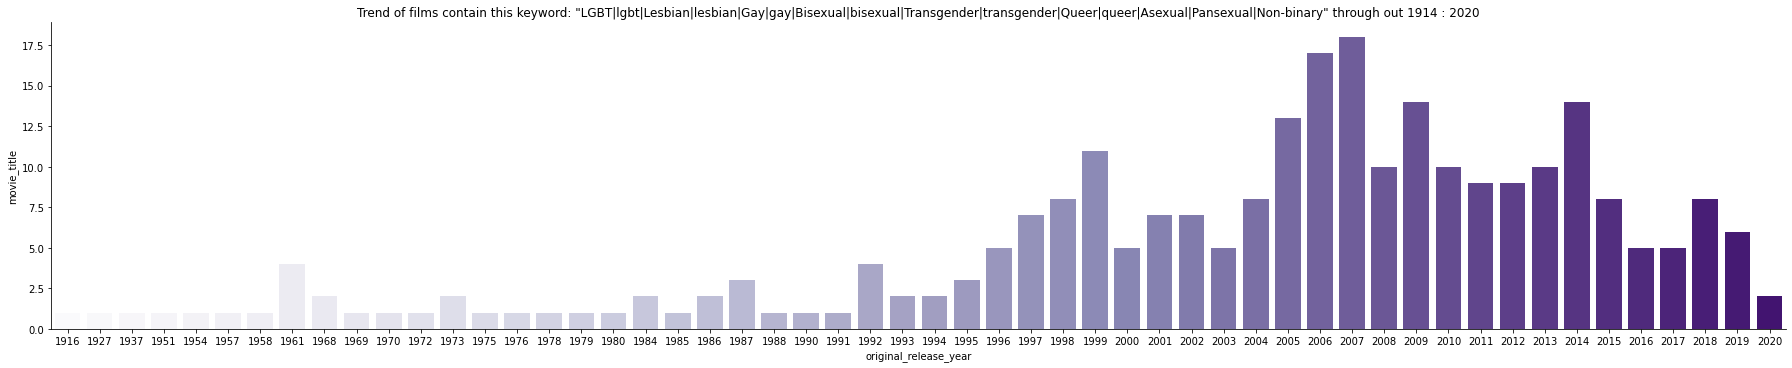

In [23]:
keyword_trend(r'LGBT|lgbt|Lesbian|lesbian|Gay|gay|Bisexual|bisexual|Transgender|transgender|Queer|queer|Asexual|Pansexual|Non-binary', 'movie_info',aspect=5)

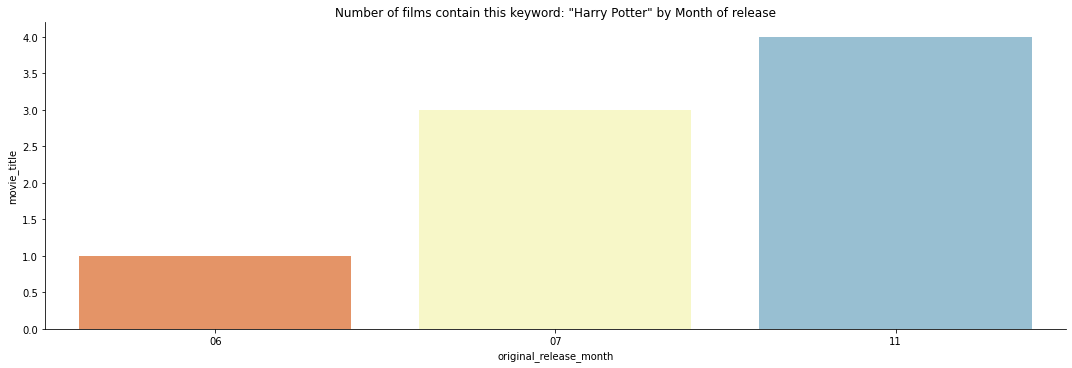

In [24]:
keyword_month('Harry Potter', 'movie_title')

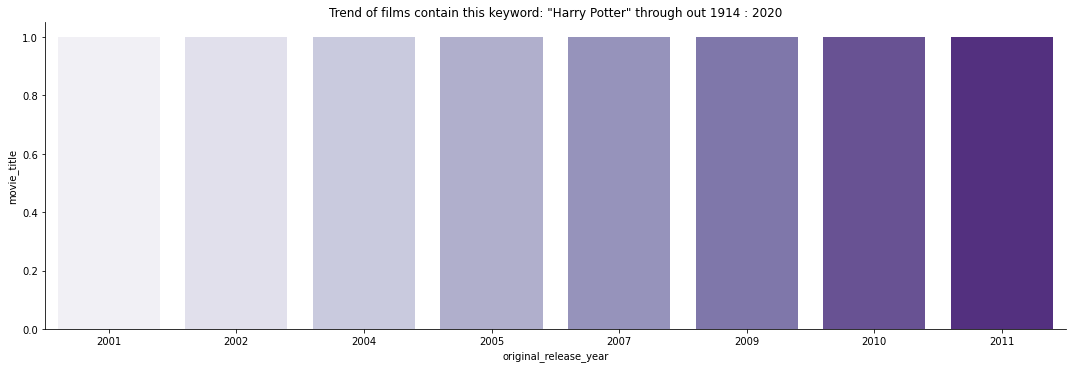

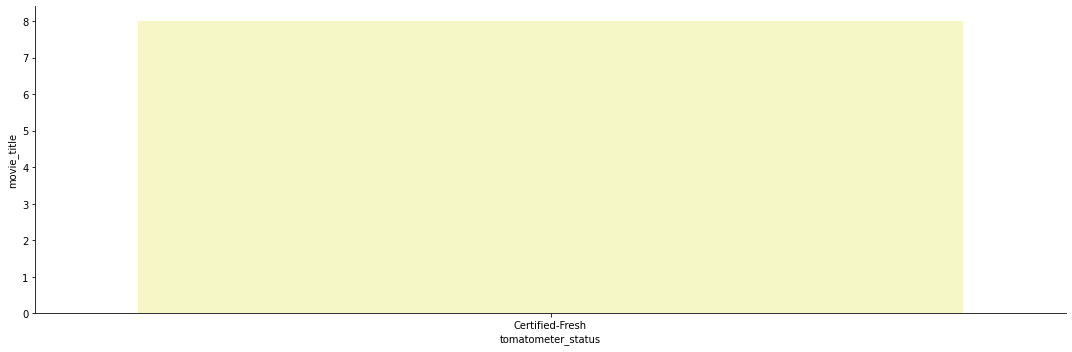

In [25]:
keyword_trend('Harry Potter', 'movie_title')

keyword_rotten('Harry Potter', 'movie_title')

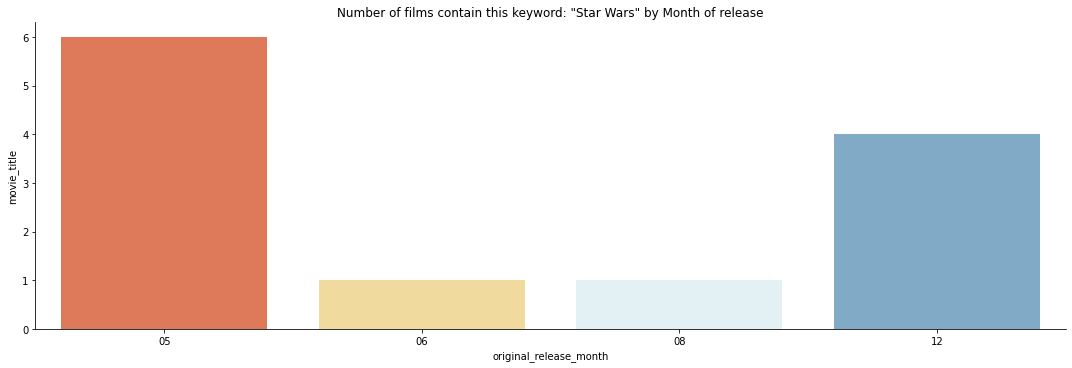

In [26]:
keyword_month('Star Wars', 'movie_title')

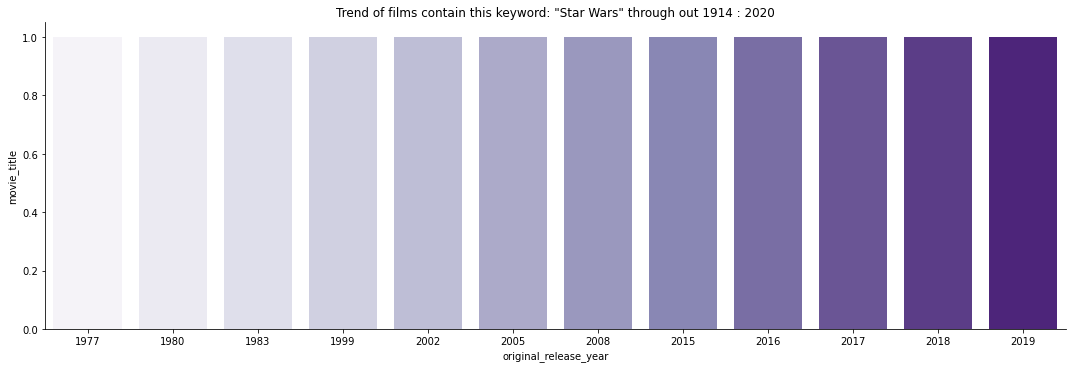

In [27]:
keyword_trend('Star Wars', 'movie_title')

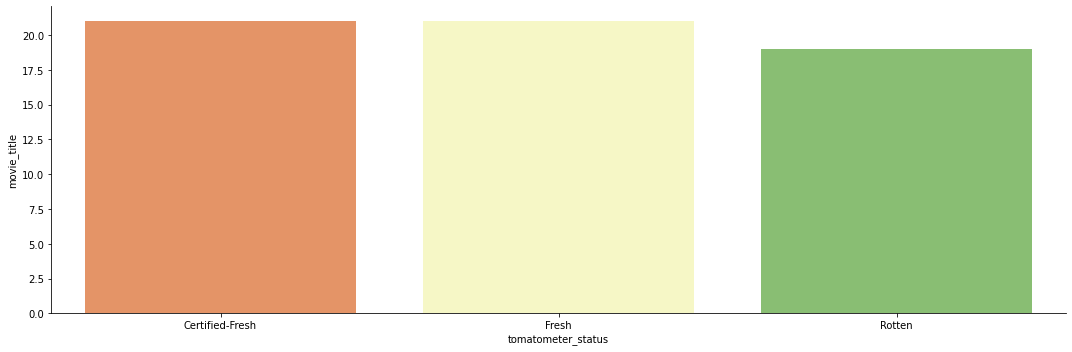

In [28]:
keyword_rotten('Meryl Streep', 'actors')

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,original_release_year,original_release_month,original_release_dom,genre_1
3030,m/avengers_age_of_ultron,Avengers: Age of Ultron,When Tony Stark (Robert Downey Jr.) jump-start...,"Exuberant and eye-popping, Avengers: Age of Ul...",PG-13,"Action & Adventure, Science Fiction & Fantasy",Joss Whedon,"Stan Lee, Jack Kirby, Joss Whedon","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-05-01,...,Upright,83.0,288708.0,61,279,89,2015,05,01,Action & Adventure
3031,m/avengers_endgame,Avengers: Endgame,"Adrift in space with no food or water, Tony St...","Exciting, entertaining, and emotionally impact...",PG-13,"Action & Adventure, Drama, Science Fiction & F...",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Mark Ruffalo, Scarlett Joha...",2019-04-26,...,Upright,90.0,70334.0,57,495,34,2019,04,26,Action & Adventure
3544,m/big_hero_6,Big Hero 6,Robotics prodigy Hiro (Ryan Potter) lives in t...,Agreeably entertaining and brilliantly animate...,PG,"Animation, Kids & Family","Chris Williams (IX), Don Hall","Jordan Roberts, Daniel Gerson","Ryan Potter, Scott Adsit, Jamie Chung, Damon W...",2014-11-07,...,Upright,91.0,129475.0,49,201,24,2014,11,07,Animation
3662,m/black_panther_2018,Black Panther,"After the death of his father, T'Challa return...",Black Panther elevates superhero cinema to thr...,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Ryan Coogler,"Joe Robert Cole, Ryan Coogler","Chadwick Boseman, Michael B. Jordan, Lupita Ny...",2018-02-16,...,Upright,79.0,88211.0,60,495,18,2018,02,16,Action & Adventure
4287,m/captain_america_civil_war,Captain America: Civil War,Political pressure mounts to install a system ...,Captain America: Civil War begins the next wav...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Chris Evans, Robert Downey Jr., Scarlett Johan...",2016-05-06,...,Upright,89.0,180162.0,63,375,40,2016,05,06,Action & Adventure
4289,m/captain_america_the_winter_soldier_2014,Captain America: The Winter Soldier,After the cataclysmic events in New York with ...,"Suspenseful and politically astute, Captain Am...",PG-13,"Action & Adventure, Science Fiction & Fantasy","Joe Russo, Anthony Russo","Christopher Markus, Stephen McFeely, Jack Kirby","Chris Evans, Samuel L. Jackson, Scarlett Johan...",2014-04-04,...,Upright,92.0,282336.0,54,272,30,2014,04,04,Action & Adventure
4805,m/comic_book_confidential,Comic Book Confidential,This 1988 film delineates the meteoric rise of...,NaN,PG,"Documentary, Musical & Performing Arts, Specia...","Ron Mann, Charles Lippincott","Charles Lippincott, Ron Mann","William M. Gaines, Harvey Kurtzman, Will Eisne...",1999-01-01,...,Upright,62.0,441.0,0,6,2,1999,01,01,Documentary
4840,m/confessions_of_a_superhero,Confessions of a Superhero,Filmmaker Matthew Ogens documents the lives of...,NaN,R,"Documentary, Special Interest",Matt Ogens,NaN,"Christopher Lloyd Dennis, Joe McQueen, Jennife...",2007-11-02,...,Upright,73.0,3214.0,6,12,0,2007,11,02,Documentary
5150,m/daredevil,Daredevil,"Attorney Matt Murdock (Ben Affleck) is blind, ...",While Ben Affleck fits the role and the story ...,PG-13,"Action & Adventure, Science Fiction & Fantasy",Mark Steven Johnson,Mark Steven Johnson,"Ben Affleck, Jennifer Garner, Colin Farrell, M...",2003-02-14,...,Spilled,35.0,468452.0,45,100,129,2003,02,14,Action & Adventure
6286,m/fantastic_four,Fantastic Four,Scientist Reed Richards (Ioan Gruffudd) persua...,"Marred by goofy attempts at wit, subpar acting...",PG-13,"Action & Adventure, Science Fiction & Fantasy",Tim Story,"Mark Frost, Michael France, Carl Johansen","Jessica Alba, Chris Evans, Michael Chiklis, Io...",2005-07-08,...,Spilled,45.0,759204.0,41,58,156,

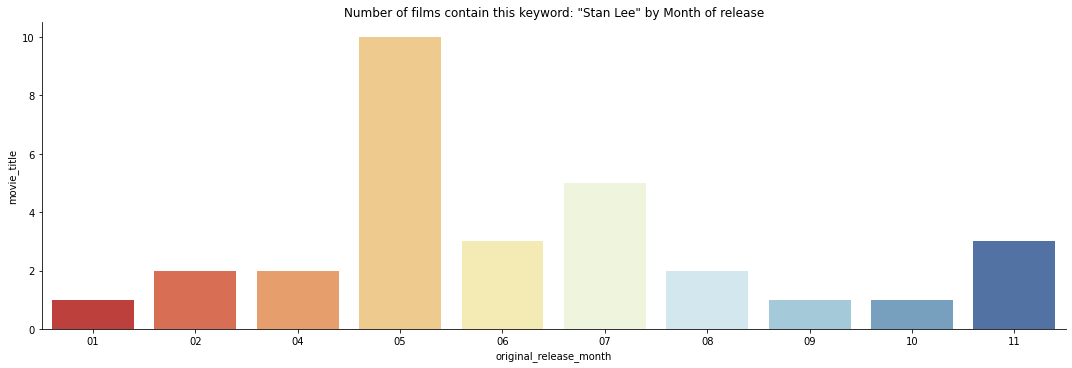

In [29]:
keyword_month(r'Stan Lee', 'actors')

film[film['actors'].str.contains('Stan Lee').fillna(False)]